# Matheus Magalhães Nascimento Silva | DRE: 123504503

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Generating 20 random points from a normal bivariate distribution w/ mean (0,0) and covariance identity matrix

In [74]:
# Variables:
n = 20 # No. of samples.
mean = [0,0] # Mean.
cov = np.eye(2) # 2x2 identity covariance matrix.

In [75]:
# Generating 20 random points:
X = np.random.multivariate_normal(mean,cov,n)

In [76]:
# +1 class for all of them:
y = np.ones(n)

In [77]:
# DataFrame for better visualization:
df_A = pd.DataFrame(X, columns=["x1","x2"])
df_A["class"] = y

print(df_A)

          x1        x2  class
0   0.834032 -1.323564    1.0
1  -0.516471  0.226974    1.0
2   1.826925  0.553233    1.0
3  -1.491973  1.469033    1.0
4   0.951641 -1.534619    1.0
5   2.235684  0.178324    1.0
6  -0.159931 -0.201378    1.0
7   0.716014  0.868114    1.0
8  -0.942842 -0.876253    1.0
9  -1.244595  0.026100    1.0
10  0.171400  0.809459    1.0
11 -1.036938 -0.290116    1.0
12  0.370763  0.742941    1.0
13  0.661741  0.771846    1.0
14 -0.325181 -1.277084    1.0
15 -0.049734  1.189820    1.0
16 -0.844001 -0.374884    1.0
17 -0.343666 -0.804338    1.0
18  0.020050 -1.056311    1.0
19 -0.415784 -0.586533    1.0


## Generating 20 random points from a dislocated (mean = (1,1))bivariate normal distribution

In [78]:
# Variables:
dislocated_mean = [3,3]

In [79]:
# Generating another 20 random points:
W = np.random.multivariate_normal(dislocated_mean,cov,n)

In [80]:
# -1 class for all of them:
z = (-1)*np.ones(n)

In [81]:
# DataFrame for better visualization:
df_B = pd.DataFrame(W, columns=["x1","x2"])
df_B["class"] = z
print(df_B)

          x1        x2  class
0   2.108382  1.731827   -1.0
1   5.970351  1.858301   -1.0
2   2.220277  3.173672   -1.0
3   4.246411  1.172378   -1.0
4   5.717984  2.512646   -1.0
5   3.017570  2.010683   -1.0
6   3.852485  4.562586   -1.0
7   2.904419  3.045796   -1.0
8   2.663187  2.597046   -1.0
9   4.350715  3.690520   -1.0
10  1.773274  2.371446   -1.0
11  2.224341  4.076688   -1.0
12  2.715341  3.685975   -1.0
13  2.997353  2.099863   -1.0
14  3.830949  1.844700   -1.0
15  3.008752  2.604412   -1.0
16  3.346310  0.175220   -1.0
17  3.864060  4.608328   -1.0
18  2.185658  1.340443   -1.0
19  4.450202  4.384927   -1.0


## Visualizing the generated data

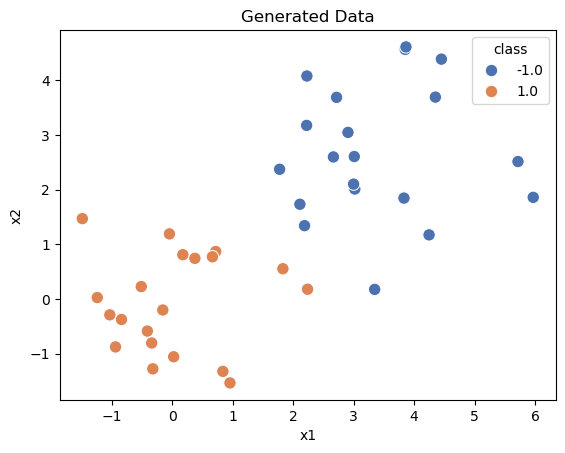

In [82]:
# Concatenating the 2 DataFrames:
df = pd.concat([df_A, df_B], ignore_index=True)

sns.scatterplot(x="x1", y="x2", hue="class", data=df, s=80, palette="deep")

plt.title("Generated Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Creating the Perceptron class

In [99]:
class Perceptron:
    def __init__(self, n_inputs, learning_rate=0.02, n_epochs=100):
        self.weights = np.random.randn(n_inputs) # Random initial weights.
        self.bias = np.random.randn() # Random initial bias.
        self.lr = learning_rate # Learning rate.
        self.epochs = n_epochs # No. of training epochs.

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # Activation function.
    
    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias # Calculates the wi*xi + b function.
        return self.activation(linear_output) # Applies the bipolar function.
    
    def fit(self, X, y):
        for _ in range(self.epochs): # Iterates through epochs.
            for xi, target in zip(X, y): # Each point.
                y_pred = self.predict(xi) # Calculates the prediction.
                error = target - y_pred # Calculates the error (real - predicted).
                self.weights += self.lr * error * xi # Adjusts the weights.
                self.bias += self.lr * error # Adjusts the bias.

## Training the Perceptron 5 times


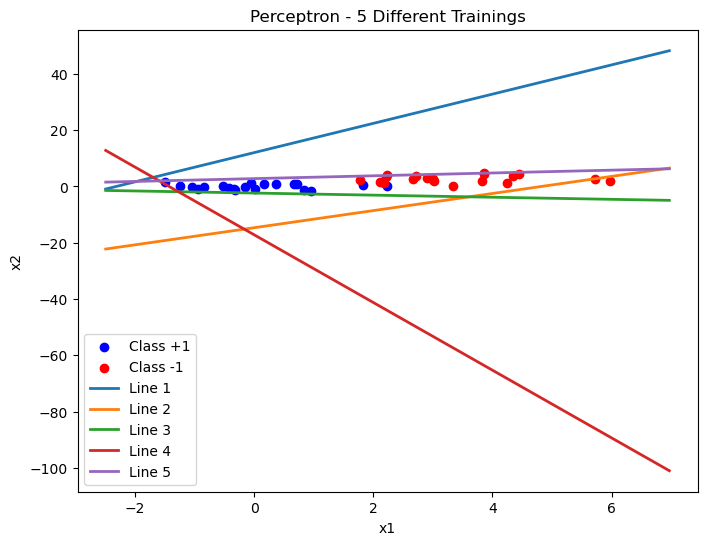

In [134]:
plt.figure(figsize=(8,6))

# Scatter plot:
plt.scatter(df_A["x1"], df_A["x2"], color="blue", label="Class +1")
plt.scatter(df_B["x1"], df_B["x2"], color="red", label="Class -1")

# X axis for the 5 lines:
x_vals = np.linspace(df["x1"].min()-1, df["x1"].max()+1, 100)

# Training 5 different Perceptron's:
for i in range(5):
    p = Perceptron(n_inputs=2, learning_rate=0.1, n_epochs=20)
    p.fit(X, y)

    # Line equation: w1*x1 + w2*x2 + b = 0
    y_vals = -(p.weights[0]/p.weights[1]) * x_vals - p.bias/p.weights[1]
    
    plt.plot(x_vals, y_vals, linewidth=2, label=f"Line {i+1}")

# Graph adjustments:
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron - 5 Different Trainings")
plt.legend()
plt.show()

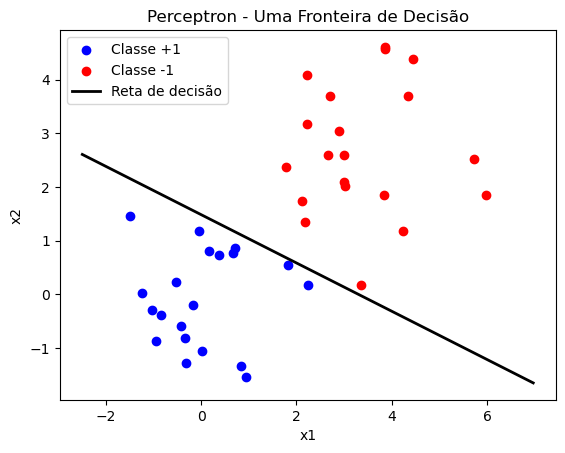

In [ ]:
# Scatter plot:
plt.scatter(df_A["x1"], df_A["x2"], color="blue", label="Classe +1")
plt.scatter(df_B["x1"], df_B["x2"], color="red", label="Classe -1")

# Training 1 Perceptron:
p = Perceptron(n_inputs=2, learning_rate=0.1, n_epochs=20)
p.fit(X, y)

# Generates x values:
x_vals = np.linspace(df["x1"].min()-1, df["x1"].max()+1, 100)

# Line equation: w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1/w2)*x1 - b/w2
y_vals = -(p.weights[0]/p.weights[1]) * x_vals - p.bias/p.weights[1]

# Plots the line:
plt.plot(x_vals, y_vals, color="black", linewidth=2, label="Reta de decisão")

# Graph adjustments:
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron - Uma Fronteira de Decisão")
plt.legend()
plt.show()
